In [21]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def rule3(Aun_array, Bun_array):
    Qun = np.sqrt(Aun_array**2 + Bun_array**2)
    return Qun

def rule4(Q, Ae, Be, Aun, Bun, A, B):
    Qun = np.abs(Q)*np.sqrt(((Ae*Aun/A)**2)+((Be*Bun/B)**2))
    return Qun

In [22]:
#V=volts at selected radius, r=radius (in meters)

V07 = 10.74
V065 = 10.61
V06 = 10.37
V055 = 10.20
V05 = 10.07
V045 = 9.84
V04 = 9.42
V035 = 9.36
V030 = 9.02
V025 = 8.68
V02 = 8.36
V015 = 7.43
V01 = 6.90

r07 = .070
r065 = .065
r06 = .060
r055 = .055
r05 = .050
r045 = .045
r04 = .040
r035 = .035
r030 = .030
r025 = .025
r02 = .020
r015 = .015
r01 = .010

r_un = .0005
V_un = .05

In [23]:
V_array = np.array ([V07, V065, V06, V055, V05, V045, V04, V035, V030, V025, V02, V015, V01])
r_array = np.array ([r07, r065, r06, r055, r05, r045, r04, r035, r030, r025, r02, r015, r01])
dV_array = np.array ([V065, V06, V055, V05, V045, V04, V035, V030, V025, V02, V015, V01, -1])
dr_array = np.array ([r065, r06, r055, r05, r045, r04, r035, r030, r025, r02, r015, r01, -1])

dV = np.delete((V_array - dV_array), [12])
dV_un = rule3(V_un, V_un)
print('We had volt changes of', dV, 'with an uncertainty of +/-', '%.2g' % dV_un, 'volts.\n')

dr = np.delete((r_array - dr_array), [12])
drp = np.delete(dr, [1,2,3,4,5,6,7,8,9,10,11])
dr_un = rule3(r_un, r_un)
print('We had constant changes in radius of', drp, 'with an uncertainty of +/-', '%.2g' % dr_un, 'meters.\n')

Efield = ((1 * dV)/dr)
Efield_un = (rule4(Efield, 1, -1, dV_un, dr_un, dV, dr))
Efield_unp = np.around(Efield_un, decimals=1, out=None)
print('We calculated our electric fields (starting at .065m) to be', Efield, '\n with uncertainties of +/-', Efield_unp, 'volts per meter.\n')

rmid = np.delete((.5*(r_array + dr_array)), [12])
rmid_un = .5*(rule3(r_un, r_un))
print('rmid:', rmid, 'with an uncertainty of +/-', '%.2g' % rmid_un, 'meters.\n')

lnEfield = np.log(Efield)
lnEfield_un = np.abs(np.log(np.average(Efield))-np.log(np.average(Efield)+Efield_un))
lnEfieldp = np.around(lnEfield, decimals=2, out=None)
lnEfield_unp = np.around(lnEfield_un, decimals=3, out=None)
print ('lnEfield:', lnEfieldp, '\n with uncertainties of +/-', lnEfield_unp, '.\n')

lnrmid = np.log(rmid)
lnrmid_un = np.abs(np.log(np.average(rmid))-np.log(np.average(rmid)+rmid_un))
lnrmidp = np.around(lnrmid, decimals=4, out=None)
print ('lnrmid:', lnrmidp, 'with an uncertainty of +/-', '%.2g' % lnrmid_un, '.\n')

We had volt changes of [0.13 0.24 0.17 0.13 0.23 0.42 0.06 0.34 0.34 0.32 0.93 0.53] with an uncertainty of +/- 0.071 volts.

We had constant changes in radius of [0.005] with an uncertainty of +/- 0.00071 meters.

We calculated our electric fields (starting at .065m) to be [ 26.  48.  34.  26.  46.  84.  12.  68.  68.  64. 186. 106.] 
 with uncertainties of +/- [14.6 15.7 14.9 14.6 15.6 18.5 14.2 17.1 17.1 16.8 29.9 20.6] volts per meter.

rmid: [0.0675 0.0625 0.0575 0.0525 0.0475 0.0425 0.0375 0.0325 0.0275 0.0225
 0.0175 0.0125] with an uncertainty of +/- 0.00035 meters.

lnEfield: [3.26 3.87 3.53 3.26 3.83 4.43 2.48 4.22 4.22 4.16 5.23 4.66] 
 with uncertainties of +/- [0.206 0.219 0.21  0.206 0.218 0.254 0.201 0.237 0.237 0.233 0.383 0.279] .

lnrmid: [-2.6956 -2.7726 -2.856  -2.9469 -3.047  -3.1583 -3.2834 -3.4265 -3.5936
 -3.7942 -4.0456 -4.382 ] with an uncertainty of +/- 0.0088 .



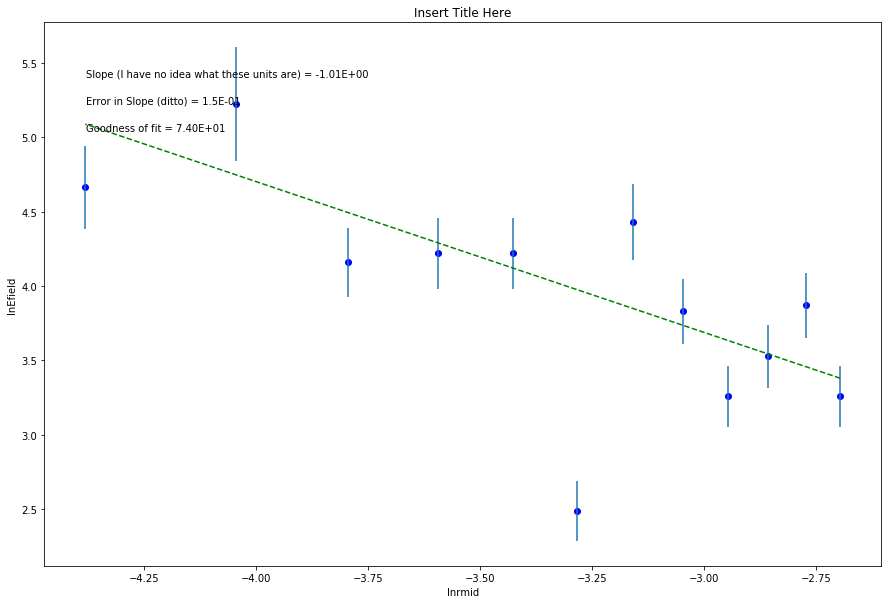

In [24]:
#Re-assign variables as x, y, dy so that the following code may remain generic

x = lnrmid   #this should be the array you want to plot on the x axis
y = lnEfield
dy = lnEfield_un  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('lnrmid')
plt.ylabel('lnEfield')
plt.title('Insert Title Here')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (I have no idea what these units are) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (ditto) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()